In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Set up the plotting parameters
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
# Load the dataset from a CSV file
data1 = pd.read_csv('Air_quality_index.csv')
data = data1.copy()
data['AQI_Range'] = data.apply(lambda row: "High" if row['Air_Quality_Index'] > 100 else "Low", axis=1)
data.head(5)

,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-02-28,2,28,None,1,0.038000,0.038,14.0,35,Low
1,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-01,3,1,None,17,0.037235,0.054,12.0,50,Low
2,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-02,3,2,None,17,0.038235,0.055,12.0,51,Low
3,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-03,3,3,None,9,0.024333,0.043,14.0,40,Low
4,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-04,3,4,None,17,0.049647,0.063,10.0,77,Low


In [3]:
#Performed the following changes for logistic regression in the above dataset.
#If the Air_Quality_Index lies between 0 to 50 the AQI_Range is good, and anything above 50 is bad
df=data
df4=df
median_value = np.median(df['Air_Quality_Index'])
median_value

39.0

In [4]:
def AQI_Range(x):
    if x<=50.0:
        return "Good"
    elif x>50:
        return "Bad"
df4['AQI_Range'] = df4['Air_Quality_Index'] .apply(AQI_Range)

df4.head(5)
df.to_csv('newdataset1.csv', index=False)

In [5]:
df = pd.read_csv('newdataset1.csv')
df1 = df.copy()
df1.head(5)

,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-02-28,2,28,None,1,0.038000,0.038,14.0,35,Good
1,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-01,3,1,None,17,0.037235,0.054,12.0,50,Good
2,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-02,3,2,None,17,0.038235,0.055,12.0,51,Bad
3,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-03,3,3,None,9,0.024333,0.043,14.0,40,Good
4,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-04,3,4,None,17,0.049647,0.063,10.0,77,Bad


In [6]:
# Load the dataset from 'newdataset1.csv' and split it into train and test sets and 
data= pd.read_csv('newdataset1.csv')
x = data.drop(columns=['AQI_Range'])
y = data['AQI_Range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
train_data = x_train.copy()
train_data['AQI_Range'] = y_train
train_data.to_csv('train_data.csv', index=False)
test_data = x_test.copy()  # Make a copy of the features for testing data
test_data['AQI_Range'] = y_test
test_data.to_csv('test_data.csv', index=False) 
#Load the train and test datasets
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
x = data.drop(columns=['AQI_Range'])
y = data['AQI_Range']

In [7]:
# Define the features and target variable
features = ['Mean_Ozone_Concentration', 'Max_Ozone_Value', 'Hour_Max_Ozone_Concentration']
target = 'AQI_Range'
# Map the target variable 'AQI_Range' to binary values (Good: 0, Bad: 1) for both train and test datasets
train_data['AQI_Range'] = train_data['AQI_Range'].map({'Good': 0, 'Bad': 1})
test_data['AQI_Range'] = test_data['AQI_Range'].map({'Good': 0, 'Bad': 1})

In [8]:
# Define the training and testing data
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [9]:
# Create a Logistic Regression model and fit it with the training data ans display it
model = LogisticRegression()
model.fit(X_train, y_train)
model

LogisticRegression()

In [10]:
# Get the intercept and coefficients of the logistic regression model
intercept = model.intercept_[0]
print("Intercept:", intercept)
coefficients = model.coef_[0]
print("Coefficients:", coefficients)

Intercept: -9.846869543941143
Coefficients: [ 6.39173753e+01  1.13976352e+02 -2.35567547e-03]


In [11]:
# Calculate log-odds for the training data
log_odds = intercept + np.dot(X_train, coefficients)
print("Log-Odds:", log_odds)


Log-Odds: [-3.22629778 -8.11188553 -4.06171566 ... -2.7929789  -4.02645531
 -1.96573654]


In [12]:
# Calculate odds ratios for the features
odds_ratios = np.exp(coefficients)
print("Odds Ratios:", odds_ratios)

Odds Ratios: [5.74068046e+27 3.15718933e+49 9.97647097e-01]


In [13]:
# Calculate the absolute values of coefficients and identify the most predictive features
abs_coefficients = np.abs(coefficients)
most_predictive_features = [features[i] for i in np.argsort(abs_coefficients)[::-1]]
print("Most Predictive Features:", most_predictive_features)

Most Predictive Features: ['Max_Ozone_Value', 'Mean_Ozone_Concentration', 'Hour_Max_Ozone_Concentration']


In [14]:
# Make predictions on the test data and calculate accuracy and Generate a classification report to evaluate the model's performance
y_pred = model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", round(acc_test, 2))
print(classification_report(y_test, y_pred))

Testing Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     34993
           1       1.00      0.47      0.64      5209

    accuracy                           0.93     40202
   macro avg       0.96      0.74      0.80     40202
weighted avg       0.94      0.93      0.92     40202



In [15]:
# Add a constant term to the training data for statsmodels OLS regression
X_train_sm = sm.add_constant(X_train)

# Fit an OLS regression model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Display the summary of the OLS regression model
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AQI_Range   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                 3.906e+04
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:08:10   Log-Likelihood:                -8367.4
No. Observations:              160807   AIC:                         1.674e+04
Df Residuals:                  160803   BIC:                         1.678e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.7291      0.004   -168.750      0.000      -0.738      -0.721
Mean_Ozone_Concentration        -3.7356      0.135    -27.634      0.000      -4.001      -3.471
Max_Ozone_Value                 22.6862      0.122    186.539      0.000      22.448      22.925
Hour_Max_Ozone_Concentration     0.0020      0.000      5.549      0.000       0.001       0.003
==============================================================================
Omnibus:                    17748.021   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24339.933
Skew:                           0.949   Prob(JB):                         0.00
Kurtosis:                       3.183   Cond. No.                     2.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Calculate and display a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[34993,     0],
       [ 2758,  2451]])

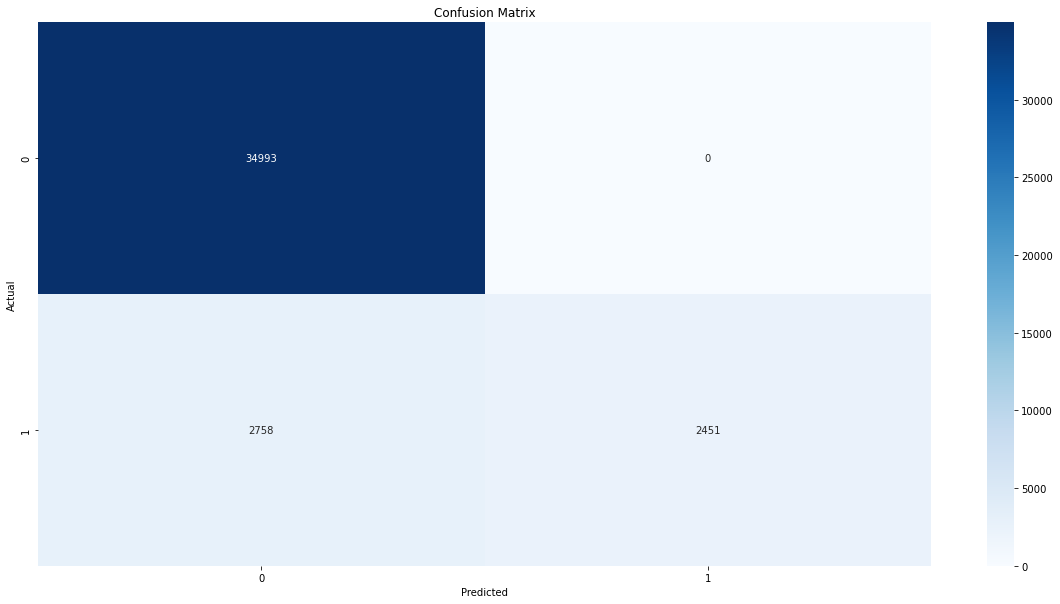

In [17]:
# Create a heatmap of the confusion matrix for visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()